In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
# Check for missing values
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [45]:
# Split data into features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [47]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [49]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [51]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [53]:
# Make prediction
y_pred = knn.predict(X_test)

In [55]:
# Evaluation Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
error_rate = 1 - accuracy

# Display results
print("\nConfusion Matrix:\n", conf_matrix)
print("\nAccuracy:", round(accuracy, 4))
print("Error Rate:", round(error_rate, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))


Confusion Matrix:
 [[79 20]
 [28 27]]

Accuracy: 0.6883
Error Rate: 0.3117
Precision: 0.5745
Recall: 0.4909


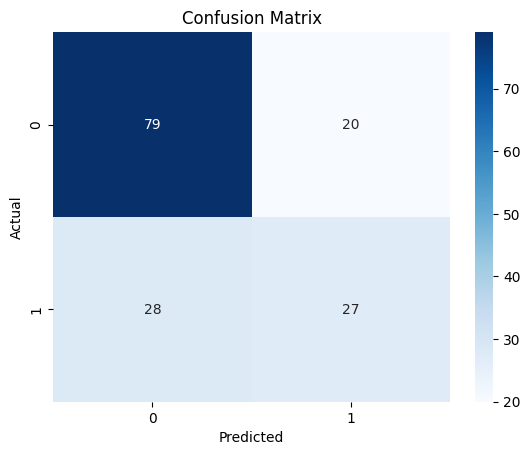

In [57]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()